In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wordcloud import WordCloud, STOPWORDS
import PIL.Image

# Abstract:
In this report, our primary objective is to explore factors contributing to strokes, focusing on gender differences, diseases such as hypertension and heart disease, and BMI. We will analyze a dataset, beginning with the creation of a word cloud to highlight key themes related to stroke, health, and wellness. Following this, we will delve into the dataset, examining features and relationships using a correlation matrix and heatmap. Gender distribution will be visualized through color-coding, with explanations provided. Smoking status and residence type will be explored through various graphical representations. Additionally, we will identify the most common work type and present it as a percentage in a pie chart. Countplots will be generated to examine the relationships between stroke and hypertension, as well as stroke and heart disease. Explorations into age distribution, smoking status, residence type, BMI, and glucose levels will be carried out using various visualizations such as KDE plots, histograms, joint plots, and swarm plots. Scatterplots and catplots will further illuminate relationships between age, gender, profession type, and glucose or BMI levels. In conclusion, we will summarize key findings, offering insights into the factors associated with strokes. Any references used in the report will be included for transparency and credibility.

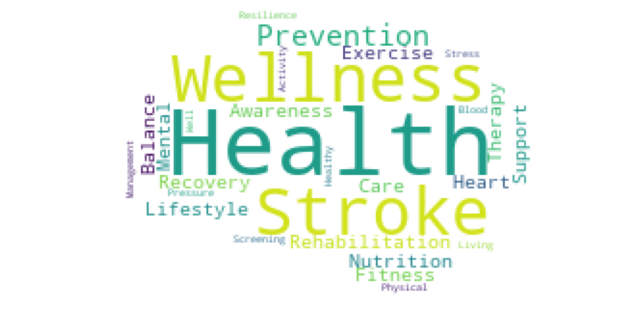

In [ ]:
text = open('stroke.txt','r').read()
pic_python = np.array(PIL.Image.open('brain.jpg'))
plt.figure(figsize=(8,8))
wc = WordCloud(mask=pic_python, background_color='white').generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

This word cloud is in the shape of a brain, which represents our main topic: **Stroke**

# What is the main cause for stroke?
High blood pressure is a leading cause of stroke. It occurs when the pressure of the blood in your arteries and other blood vessels is too high. [1]

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Variables:
1. Gender: The gender of the person (Male/Female)
2. Age: The age of the person in years
3. Hypertension: Does the person have hypertension (1 = Yes/ 0 = No)
4. Heart Disease: Does the person have Heart Disease (1 = Yes/ 0 = No)
5. Ever Married: Was the person ever married? (Yes/No)
6. Work Type: What type of job does the person have? (Private, Self-Employed, Government, etc.)
7. Residence type: The type of area does the person live (Rural or Urban)
8. Average Glucose Level: Average glucose level in blood
9. BMI: Body Mass Index
10. Smoking Status: Did the person smoke? (formerly smoked, never smoked, smokes or Unknown)
11. Stroke: Did the person have a stroke (1 = Yes/ 0 = No)

# Task 1: Correlation matrix and heatmap to show numeric correlations within the datset

In [ ]:
numeric_df = df[['age','avg_glucose_level','bmi']]
numeric_df.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


In [ ]:
corr = numeric_df.corr()
corr

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, square=True, linewidth=0.5, vmin=-1, vmax=1,cmap='Reds',annot=True)
plt.show()

NameError: ignored

<Figure size 500x500 with 0 Axes>

This correlation matrix/heatmap shows us there is small positive correlation between bmi and average glucose level. It also shows us there is a small positive correlation between age and average glucose level. Lastly, there is a slightly bigger, but still small positive correlation with bmi and age.

# Task 2: Gender distribution

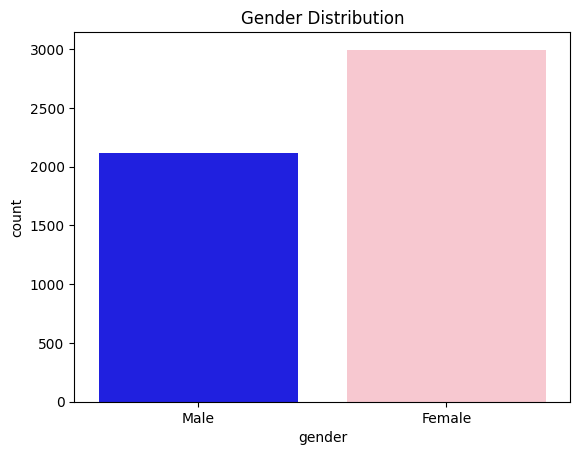

In [ ]:
df = df[df['gender'].str.lower() != 'other']
colors = {'Male': 'blue', 'Female': 'pink'}
sns.countplot(data=df, x='gender',palette=colors)
plt.title("Gender Distribution")
plt.show()

There are more females than males in our dataset

# Task 3: Smoking status and residence type relationship

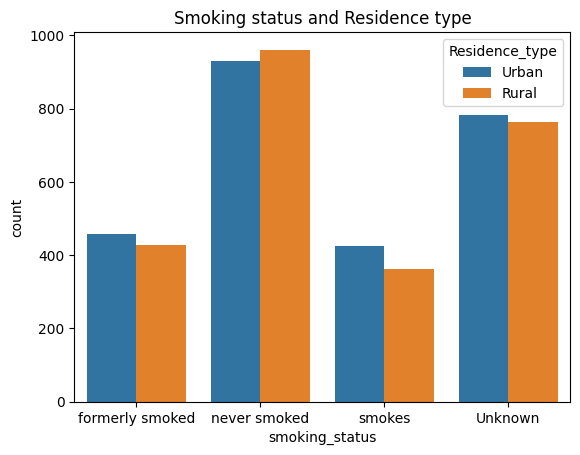

In [ ]:
sns.countplot(x='smoking_status', hue='Residence_type', palette={'Urban':'#d6ccc2','Rural':'#6a994e'}, data=df)
plt.title("Smoking status and Residence type")
plt.show()

As we can see from our graph, residence_type has little to no effect on smoking status.

# Task 4: Smoking status and residence type relationship

In [ ]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
values = df['work_type'].value_counts().tolist()
values

[2924, 819, 687, 657, 22]

In [ ]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
names = df['work_type'].value_counts().index.tolist()
names

['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']

In [ ]:
colors = ['#B91372', '#CC92C2', '#8F3985', '#EF959C', '#F9C80E',]

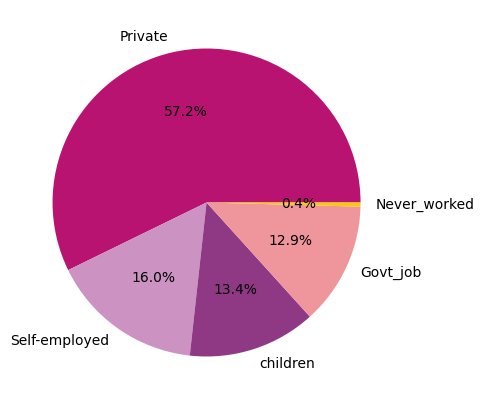

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(values, labels = names, autopct='%1.1f%%', colors = colors)
plt.show()

As shown in the pie chart, a significant majority of individuals observed are employed privately. The rest of the chart is almost evenly distributed between those who are self-employed, care for their children, or have government jobs. A very small percentage of individuals have never worked. Indicated by the lighter shade of purple, Self- employed individuals are the second most common work type in the data set followed by children and those who work Government Jobs.


# Task 5: Plot showing Hypertension and Heart Disease(Stroke is Hue)

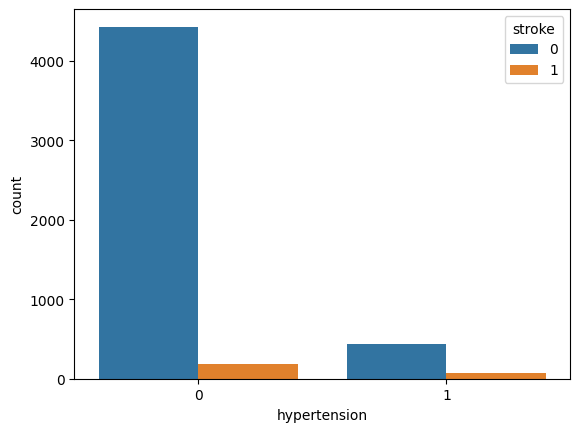

In [ ]:
sns.countplot(data=df, x='hypertension', hue='stroke',palette={0:'#3a86ff',1:'#e63946'})
plt.title("Hypertension and Heart Disease")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.show()

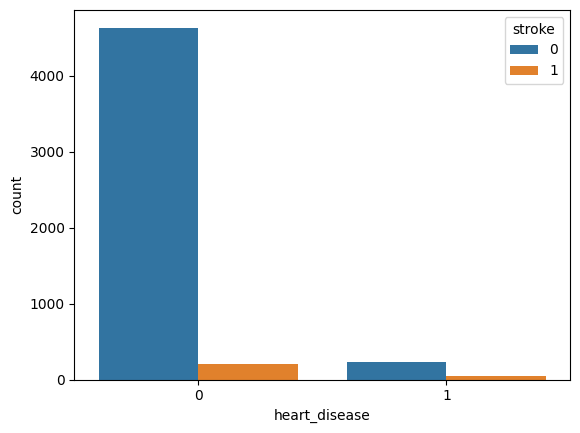

In [ ]:
sns.countplot(data=df, x='heart_disease', hue='stroke',palette={0:'#b8c0ff',1:'#f77f00'})
plt.title("Heart Disease and Stroke")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show() I'm

In cases where both hypertension and heart disease were analyzed, we can see that there is only one instance of stroke that occurs in each visualization, with a slighlty higher count of those not having a stroke (0 strokes), in the hypertension category.

#Task 6: KDE plot showing Age (Stroke is Hue)

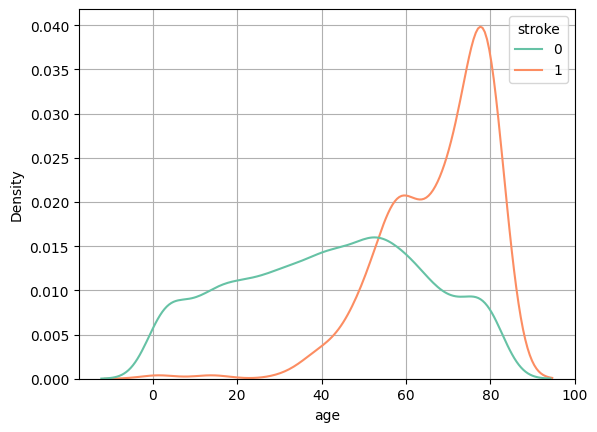

In [ ]:
sns.kdeplot(data=df, x='age', hue='stroke', common_norm=False, palette='Set2')
plt.grid(True)
plt.show()

This KDE plot shows the relationship between age and number of strokes. The older the person is, the likely their chances of having a stroke in their lifetime. People around the age of late 70s have had at least one stroke. The likelihood of someone having a stroke is around the ages of 45 to 80 years old.

# Task 7: Scatterplot displaying relationship of BMI & glucose

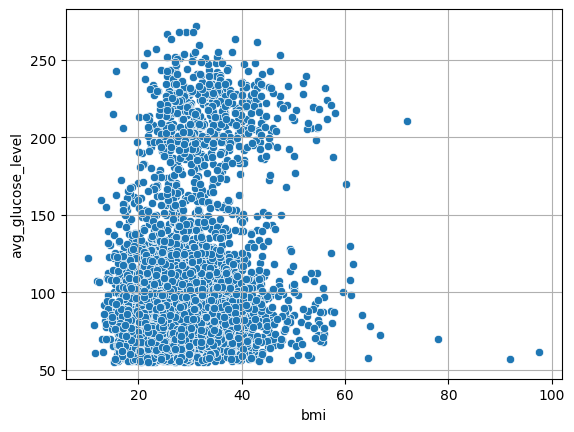

In [ ]:
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level',marker='o', s=25)
plt.grid(True)
plt.title("BMI and Average Glucose Levels")
plt.xlabel("BMI")
plt.ylabel("Average Glucose Level")
plt.show()

A healthy BMI is 18.5- 24.9. A healthy glucose level after eating is 170-200.

According to the graph, most people are overweight according to BMI and have an extremely high glucose level. Hence, indicating that some people on this data set may be diabetic or prediabetic.

Those who have diabetes, are twice likely to have a stroke.

# Task 8: Histogram showing the average glucose level for Male and Females

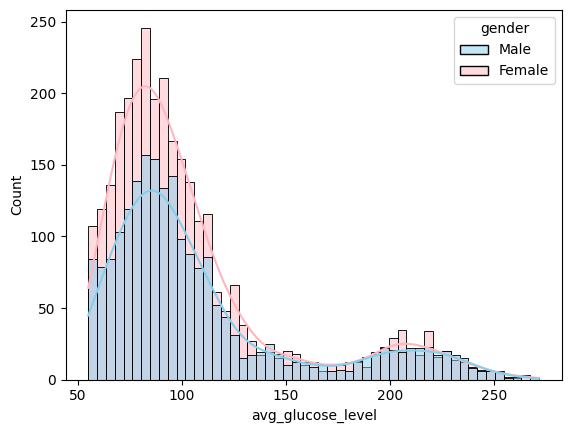

In [ ]:
sns.histplot(data=df, x='avg_glucose_level', hue='gender',palette={'Female':'lightpink', 'Male':'skyblue'}, kde=True)
plt.xlabel("Average Glucose Level")
plt.title("Average Glucose Level for Genders")
plt.show()

The average glucose level differs between men and women. In females, the average glucose level below 100.

According to the graph, there is more women than men who have an average glucose level below 100.


# Task 9: Jointplot of BMI and Glucose

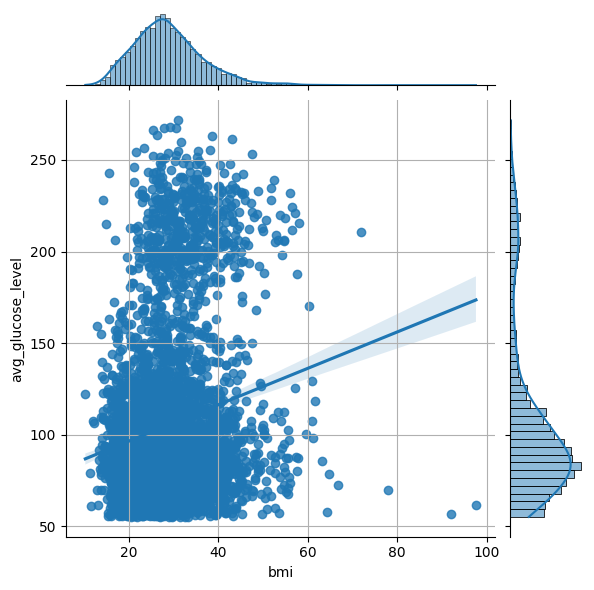

In [ ]:
sns.jointplot(data=df, x = 'bmi', y= 'avg_glucose_level',kind='reg')
plt.grid()
plt.ylabel("Average Glucose Level")
plt.xlabel("BMI")
plt.show()

The jointplot function above is called by setting the parameter ‘bmi’ to ‘avg_glucose_level’ and so a regression line is drawn on the scatter plot. We can identify outliers using the regression line on a scatter plot. It can be observed that the scatterplot above has few outliers.

Glucose levels and BMI are have a positive relationship between the columns ‘bmi’ and ‘avg_glucose_level’, because if the values of one variable increase so does the other.

# Task 10: Explore BMI of different work types (kde plot = bmi, hue = work type)

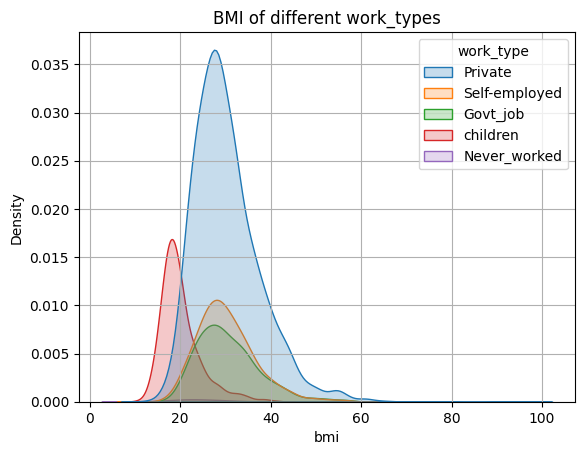

In [ ]:
sns.kdeplot(data=df, x = 'bmi', hue= 'work_type', fill=True)
plt.grid(True)
plt.title('BMI of different work_types')
plt.show()

Individuals who work in private sectors, are self employed, or have a government job tend to have a higher BMI with a median around the 30 BMI mark; this is an unhealthy BMI.

The range overall for government postions and self employment are similar in the 15 - 50 BMI range whereas private sectors have a range between 15 - 60 BMI. Showing people who work in private sectors tend to have high BMI.

# Task 11: Create a strip plot to display average glucose level for the different work types

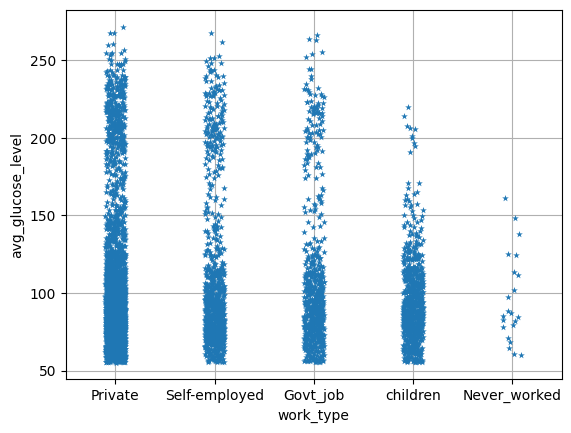

In [ ]:
sns.stripplot(data=df, x = 'work_type', y = 'avg_glucose_level',marker='*',color = '#598392')
plt.grid()
plt.title("Average Glucose Levels for Every Work Type")
plt.ylabel("Average Glucose Levels")
plt.xlabel("Work Types")
plt.show()

The swarm plot categorizes the 'avg_glucose_level' in regards to each profession 'work_type'. As the chart shows people who work in a private work environment tend to have a higher glucose average.

# Task 12: Scatterplot shows the BMI in relation to Age of men and women

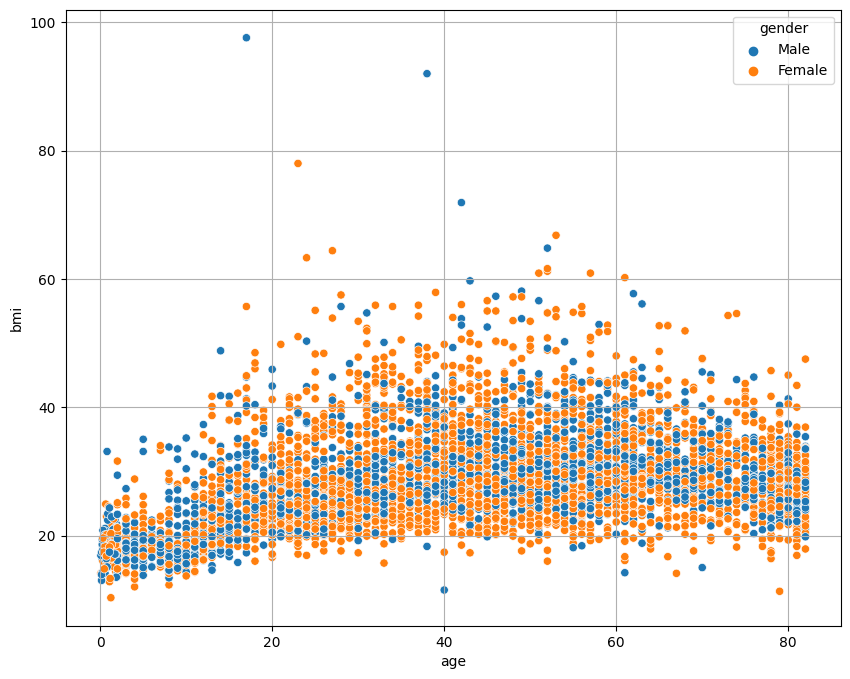

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='age', y='bmi', hue= 'gender', palette={'Male':'#4361ee','Female':'#b5838d'})
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.title("BMI and Age")
plt.show()

As seen in this scatterplot, the average bmi between both women and men is around 30.
Since 30 is deemed to be obsessed in the bmi chart, this tells us that the data consisted of people in that category.

The farther outliers are present before the age of 40 and the fartherest is before age 20.

There is a positive correlation with this scatter plot with how the plot is increasing as the x-axis increases. This can be interpretted as when people grow older, their BMI has a chance of increasing slightly.

# Task 13: Catplot shows how Average Glucose Level is related to the Work Type

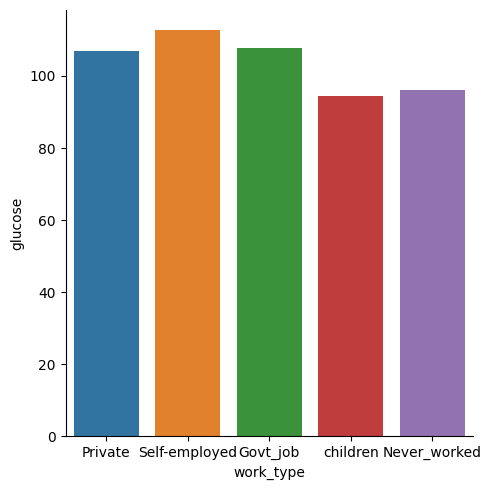

In [ ]:
sns.catplot(data=df, x="work_type", y="avg_glucose_level",  kind="bar",errorbar=None)
plt.xlabel('Work Type')
plt.ylabel('Average Glucose Levels')
plt.title("Average Glucose Levels of Work Types")
plt.show()

As seen with this catplot, this displays every profession type in the dataset and their glucose level.

The profession that has the most glucose are people who are self-employed. This can indicate how stressful it can be to be a self-employed worker compared to the other profession types.

The profession type with the least average glucose level seemed to be the children category. This could be because of how less stressful it could be taking care of children compared to working in professions such as the government.

# Task 14: Boxplot used to understand how Age is distributed by Gender

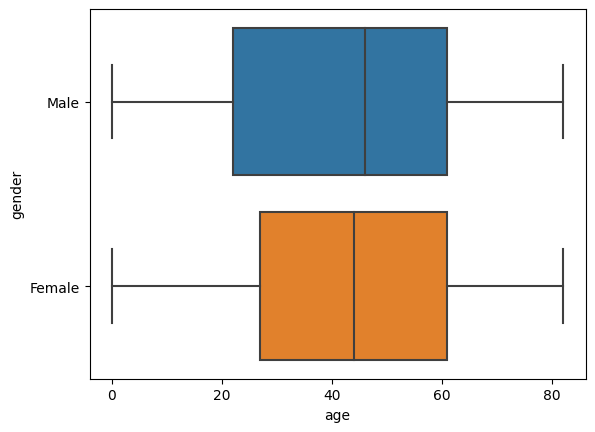

In [ ]:
sns.boxplot(data=df, x="age", y="gender",palette={'Male':'#00bbf9','Female':'#ffcad4'})
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title("Age distribution by Gender")
plt.show()

As we see in this box plot, the average glucose level is slightly higher in males compared to females. This indicates that that there is not much of a difference in glucose levels between the two groups.

You can also see that in both of the group's upper fences with how close they are to each other as well. In order for us to get rid of the outliers with an upper and lower fence we created an equation that would eliminate those specific pieces of data.

# Task 15: Scatterplot showing the relationship of Average Glucose Level and Age

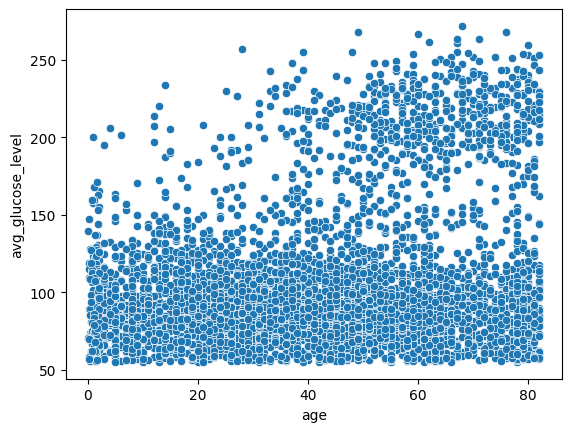

In [ ]:
sns.scatterplot(x='age', y='avg_glucose_level', data=df, marker = 'o', s=25, c='#a0c4ff')
plt.title("Average Glucose Level and Age")
plt.ylabel('Average Glucose Level')
plt.xlabel('Age')
plt.show()

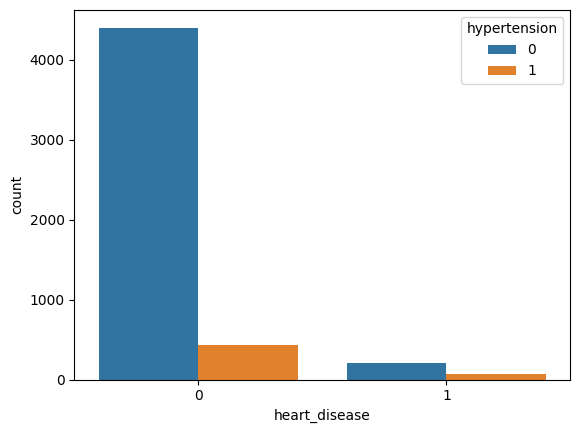

In [ ]:
sns.countplot(x='heart_disease', hue='hypertension', data=df,palette={0:'#3a86ff',1:'#ef233c'})
plt.title("Heart Disease and Hypertension")
plt.ylabel("Count")
plt.xlabel("Heart Disease")
plt.show()

As we can see, if a person had heart disease, then they also had a good chance at a hypertension. We can also infer that as a person ages, they tend to have higher average glucose levels.


# From our data, what do we know about stroke?

As age increases, there is a higher chance for stroke. This means that as someone ages, then they should take more precautions to combat their chances of stroke. Exercise and physical activity have an increasing evidence base in the primary and secondary prevention of stroke (shown in our BMI pattern).[2] Reducing/avoiding stress, especially when older, is a great way to minimize chances for stroke (shown in work-type graphs).[3] Lastly, keeping good heart health such as lowering glucose level (shown in average glucose level) has shown to have significant effect on preventing stroke.[4]

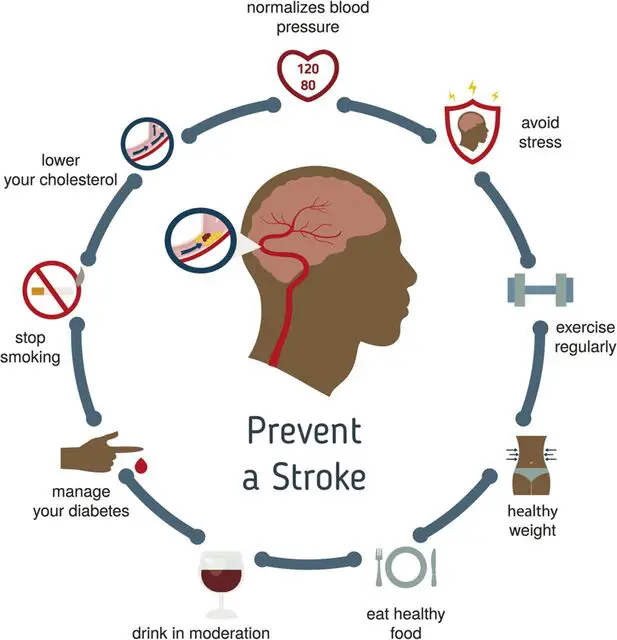

# Task 17: Conclusion

As a conclusion to our project, this dataset's analysis revealed specific tendencies that may be useful for current or future research. First, there is a slight positive correlation between the average glucose level and age, as well as between the average glucose level and BMI. Moreover, age and BMI have a little stronger but still insignificant positive correlation. The dataset has more females than males, and there doesn't seem to be much of an association between smoking status and kind of residence.

In terms of employment, the great majority of people are self-employed, with self-employment coming in second. The majority of overweight individuals with excessively high blood sugar levels raise the possibility that some of the dataset's participants are prediabetic or have diabetes.

Diabetes doubles a person's risk of stroke, whereas women often have average blood glucose levels below 100. Men also have higher average glucose levels than women. The average glucose level and BMI have a positive correlation, indicating that greater BMI values are linked to higher glucose levels.

Professionals with government jobs, self-employed work, or those in the private sector typically have higher BMIs; the private sector has the highest median BMI, suggesting possible health hazards related to these occupations.

Additionally, the data shows that those who work for themselves have higher blood glucose levels, which may be a sign of increased stress. Conversely, children have the lowest average blood sugar levels, probably because they don't face as much stress.

When it comes to gender disparities, men have somewhat higher average glucose levels than women. People who have heart disease are more likely to have hypertension, and as people age, their average blood glucose levels tend to rise.

Overall, these results display how complicated interactions between variables like gender, career, BMI, and blood sugar levels may be when analyzing patterns related to health and possible risk factors in the provided information related to strokes. With additional investigation and analysis, there could be more light shed on these connections and improve our comprehension of the health dynamics in the group we're looking at.


# References

1. https://www.cdc.gov/stroke/risk_factors.htm
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3263535/
3. https://www.umc.edu/news/CONSULT/2022/February/CON020122B.html
4. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5298897/


In [ ]:
!jupyter nbconvert --to html GroupProject.ipynb

[NbConvertApp] Converting notebook GroupProject.ipynb to html
[NbConvertApp] Writing 1945126 bytes to GroupProject.html
